# Test Models

This is for testing the saved model during the training session.

In [1]:
import deepQLearningSimple as dql
import gym
from keras.models import load_model 
from gym.envs.classic_control.mountain_car import MountainCarEnv
from gym.wrappers.time_limit import TimeLimit

import json

Using TensorFlow backend.


In [2]:
# optimal model
pathImp = "data/"
action_model = load_model(pathImp + "success_model_episode_90.h5")


#env = gym.make("MountainCar-v0")
env = dql.patientMountainCar()
agent = dql.agent(env  = env, training = False, render = True)

# Implement the action model
agent.action_dqn.dqn = action_model

# Run
agent.run(num_episode = 5, num_steps = 500)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


# Test Model: Version Simple
***

In [8]:
# Single Model Test
episode = 84

pathImp = "data/model/version_simple/"
action_model = load_model(pathImp + "success_model_episode_%s.h5" % episode)

#env = gym.make("MountainCar-v0")
env = patientMountainCar()
agent = dql.agent(env  = env, training = False, render = False)

# Implement the action model
agent.action_dqn.dqn = action_model

# Run
agent.run(num_episode = 5, num_steps = 500)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
 Game :: 1 Wins :: 1 Steps :: 198 Reward 10.364125989139936 Mean Q Value :: 13.083107948303223 Max position 0.5193744396468948 
 Game :: 2 Wins :: 2 Steps :: 195 Reward 12.124612154256894 Mean Q Value :: 11.23301887512207 Max position 0.5002926206683962 
 Game :: 3 Wins :: 3 Steps :: 155 Reward 62.870443355831235 Mean Q Value :: 7.478339195251465 Max position 0.509743746058236 
 Game :: 4 Wins :: 4 Steps :: 196 Reward 11.094621034627025 Mean Q Value :: 12.235795974731445 Max position 0.5057562089799794 
 Game :: 5 Wins :: 5 Steps :: 183 Reward 19.28457199596923 Mean Q Value :: 10.368821144104004 Max position 0.5037962914798304 


In [49]:
# Test all success models
import os
from IPython.display import clear_output


env = patientMountainCar()
agent = dql.agent(env  = env, training = False, render = False)

wins = {}
wins["model"] = []
wins["test_wins"] = []

pathImp = "./data/model/version_simple/"
files = [file for file in os.listdir(pathImp) if file.endswith(".h5") ]
counter = 0

for file in files:
    
    counter += 1
    print("{}/{}".format(counter, files.__len__()))

    # Load the model
    print("\t... load model")
    action_model = load_model(pathImp + file)

    # Implement action dqn in the game
    print("\t... update dqn")
    agent.action_dqn.dqn = action_model

    # Reset manually writer history
    print("\t... reset history")
    agent.writer_history = dql.writer("version_simple_test")

    # Run test
    print("run test:")
    agent.run(num_episode = 5, num_steps = 500)
    env.close()

    # Record performance
    wins["model"].append(file)
    wins["test_wins"].append(agent.writer_history.history["cum_win"][4])
    
    clear_output(wait = True)

{'model': ['success_model_episode_10.h5',
  'success_model_episode_100.h5',
  'success_model_episode_101.h5',
  'success_model_episode_102.h5',
  'success_model_episode_1035.h5',
  'success_model_episode_1046.h5',
  'success_model_episode_1052.h5',
  'success_model_episode_106.h5',
  'success_model_episode_109.h5',
  'success_model_episode_11.h5',
  'success_model_episode_1103.h5',
  'success_model_episode_1105.h5',
  'success_model_episode_1111.h5',
  'success_model_episode_1139.h5',
  'success_model_episode_115.h5',
  'success_model_episode_1152.h5',
  'success_model_episode_1192.h5',
  'success_model_episode_12.h5',
  'success_model_episode_1204.h5',
  'success_model_episode_1209.h5',
  'success_model_episode_1211.h5',
  'success_model_episode_1214.h5',
  'success_model_episode_1230.h5',
  'success_model_episode_1248.h5',
  'success_model_episode_1269.h5',
  'success_model_episode_1275.h5',
  'success_model_episode_1276.h5',
  'success_model_episode_1295.h5',
  'success_model_episod

In [91]:
# Store result
path = "data/model/version_simple/"

# convert into JSON
y = json.dumps(wins)

# write to local
f = open(path + "test_result.json", "w+")
f.write(y)
f.close()

## Import Backup

In [93]:
path = "data/model/version_simple/"
f = open(path + "test_result.json")
wins = f.read()
f.close()

Test models :: 209


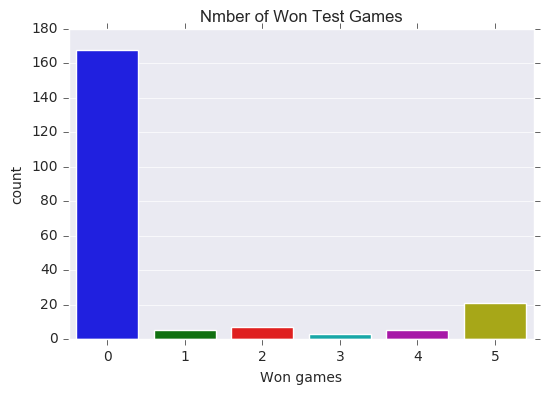

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

sns.countplot(wins["test_wins"])
plt.title("Number of Won Test Games")
plt.xlabel("Won games")

print("Test models :: %s" % len(wins["test_wins"]) )

In [85]:
x = wins["test_wins"]

counter = 0
n = len(x)
for i in set(x):
    count = len([win for win in x if win == i])
    print("{} :: {} ({}%)".format(i, count, round(count *100 / n, 2)) )

0 :: 168 (80.38%)
1 :: 5 (2.39%)
2 :: 7 (3.35%)
3 :: 3 (1.44%)
4 :: 5 (2.39%)
5 :: 21 (10.05%)
